In [10]:
import numpy as np
from sklearn.metrics import log_loss
from sympy import diff , log , exp
from sympy.abc import x
import pandas as pd
import matplotlib.pyplot as plt

### Stochastic Gradient Descent

In [24]:
xi = np.array([4,6,7,8,1,9])
yi = np.array([17,23,26,29,8,32])

eta = 0.05
b0 = 0.5
w0 = -0.1
# n = xi.shape[0]
n= len(xi)
overall = []

for epoch in range(1,101):
    for j in range(0,len(xi)):
        ycap = xi[j]*w0 + b0
        l =  (1/(2*n))*((yi[j]-ycap)**2)

        db = -(1/n)*(yi[j]-ycap)
        dw = -(1/n)*(yi[j]-ycap)*xi[j]
            
        new_b = b0 - eta*db
        new_w = w0 - eta*dw
                        
        b0 = new_b
        w0 = new_w
        
        print('L = ',l)
        print('w = ',w0,'; b =', b0)

    ycap = xi*w0 + b0
    l = (1/(2*n))*np.sum((yi-ycap)**2)
    overall.append(l)
    print('overall L = ', l)

L =  23.80083333333333
w =  0.4633333333333334 ; b = 0.6408333333333334
L =  31.945313946759256
w =  1.4422916666666667 ; b = 0.8039930555555556
L =  19.00074594917454
w =  2.323122974537037 ; b = 0.9298260995370371
L =  7.497402609348436
w =  2.9554689814814816 ; b = 1.0088693504050927
L =  1.3572137582900026
w =  2.989099495382427 ; b = 1.042499864306038
L =  1.3706607748457726
w =  3.293269846176336 ; b = 1.0762965699498055
overall L =  2.755599800575273
L =  0.6304943865691055
w =  3.384957314354498 ; b = 1.0992184369943458
L =  0.21095007410395544
w =  3.4645091981984315 ; b = 1.112477084301668
L =  0.033703604144111915
w =  3.5016067790164747 ; b = 1.1177767387042457
L =  0.001422037545130625
w =  3.492898047627405 ; b = 1.116688147280612
L =  0.9579088141465248
w =  3.5211514960031716 ; b = 1.1449415956563787
L =  0.05814454522793566
w =  3.4585036165268024 ; b = 1.1379807201590044
overall L =  1.4553654930735687
L =  0.3427336270439505
w =  3.5261037769845953 ; b = 1.1548807602

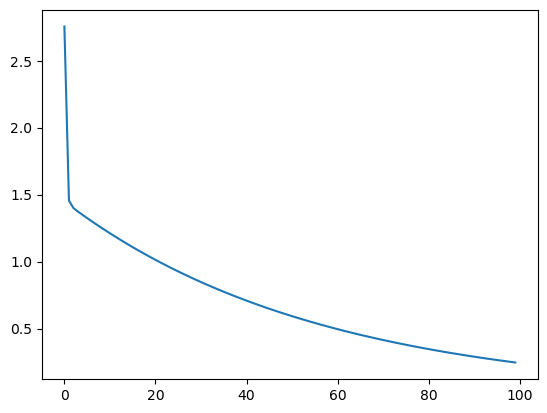

In [25]:
plt.plot(overall)

In [37]:
x = np.array([190,170,110,200,150,120,195])
y = np.array([1,0,0,1,0,0,1])
xi = ((x-np.min(x))/(np.max(x)-np.min(x)))

overall = []
def sig(x):
    return 1/(1 + np.exp(-x))
ycap = sig(b0+w0*xi)
ycap

eta = 0.5
b0 = 0.4
w0 = -0.6
ycap = sig(b0+w0*xi)
n = x.shape[0]

for i in range(1,1001):
    for j in range(0,len(xi)-1):
        ycap = sig(b0+w0*xi[j])
        l = (-1/n)*((y[j]*np.log(ycap+np.finfo(float).eps)+(1-y[j])*np.log(1-ycap)))
        db = -(1/n)*((y[j]-ycap))     
        dw = -(1/n)*((y[j]-ycap)*xi[j])  
            
        new_b = b0 - eta*db
        new_w = w0 - eta*dw
                        
        b0 = new_b
        w0 = new_w
        
        
        print(" L = " , l)
        # print(" Log_Loss = ", log_loss(y,ycap))
        print('w = ',w0,'; b =', b0)
    ycap = sig(b0+w0*xi)
    print("overall L = " ,log_loss(y,ycap))
    ln = log_loss(y,ycap)
    overall.append(ln)
    print('overall L = ', ln)

 L =  0.10886206075808463
w =  -0.5661406959840551 ; b = 0.438091717017938
 L =  0.10341991817461578
w =  -0.5906721958463046 ; b = 0.40129446722456374
 L =  0.1305414907474956
w =  -0.5906721958463046 ; b = 0.3585088507957082
 L =  0.11656446476897978
w =  -0.5508306576612136 ; b = 0.3983503889807992
 L =  0.11040848066546197
w =  -0.5679198311185394 ; b = 0.35989974870181624
 L =  0.12178812457784649
w =  -0.5724726840083744 ; b = 0.3189240726933016
overall L =  0.7875857560663625
overall L =  0.7875857560663625
 L =  0.1132314801839771
w =  -0.5377207547833454 ; b = 0.3580199930714592
 L =  0.09898813600141744
w =  -0.5615247963296632 ; b = 0.32231393075198245
 L =  0.12389058653450105
w =  -0.5615247963296632 ; b = 0.2808933542474318
 L =  0.1204678596983051
w =  -0.5208318660742957 ; b = 0.3215862845027993
 L =  0.10560206273162627
w =  -0.5374195211599727 ; b = 0.2842640605600259
 L =  0.11595889351973311
w =  -0.5418314496704117 ; b = 0.24455670396607496
overall L =  0.778728153

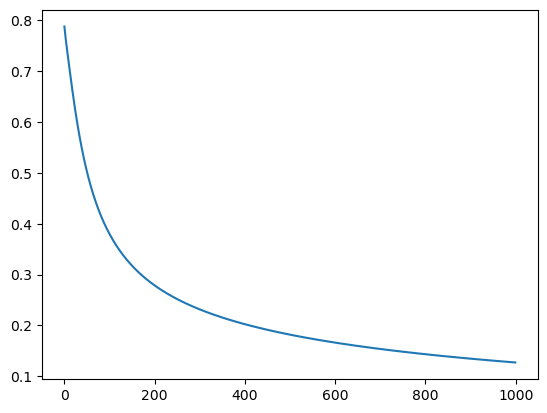

In [35]:
plt.plot(overall)

In [18]:
import numpy as np 
def sig(x):
    return 1/(1 + np.exp(-x))


In [53]:
import ipywidgets as iw

In [48]:
df = pd.read_csv('RidingMowers.csv')
df
df['Response'].replace({'Not Bought':0,'Bought' :1},inplace=True)
df.head()
x1 = df['Income']
x2 = df['Lot_Size']
y = df['Response']

x1 = ((x1-np.min(x1))/(np.max(x1)-np.min(x1)))
x2 = ((x2-np.min(x2))/(np.max(x2)-np.min(x2)))
yi = ((y-np.min(y))/(np.max(y)-np.min(y)))

### Batch Gradient Descent

eta = 0.5
b0 = .4
w1 = -0.5
w2 = 0.5
nobs = df.shape[0]
ycap = sig(x1*w1 + x2*w2 + b0)
overall = []

for epoch in range(1,101):
    for i in range(1,len(x1)):
        ycap = sig(x1[i]*w1 + x2[i]*w2 + b0)

        db = -(1/nobs)*np.sum(yi[i]-ycap)
        dw1 = -(1/nobs)*np.sum(yi[i]-ycap)*x1[i]
        dw2 = -(1/nobs)*np.sum(yi[i]-ycap)*x2[i]

            
        new_b = b0 - eta*db
        new_w1 = w1 - eta*dw1
        new_w2 = w2 - eta*dw2

        b0 = new_b
        w1 = new_w1
        w2 = new_w2
        
        # print('L = ', (1/(2*nobs)*np.sum((yi-ycap)**2)))
        print(" L = " , (-1/nobs)*((yi[i]*np.log(ycap+np.finfo(float).eps)+(1-yi[i])*np.log(1-ycap))))
        print(f" w1 = {w1} ; w2 = {w2} ; b0 = {b0}")
    ycap = sig(x1*w1 + x2*w2 + b0)
    print(" Log_Loss = ", log_loss(y,ycap))
    overall.append(log_loss(y,ycap))
    
        

 L =  0.005398248047596544
 w1 = -0.5 ; w2 = 0.49966797273185415 ; b0 = 0.3982734582056416
 L =  0.005492084268873601
 w1 = -0.5 ; w2 = 0.49923193558087553 ; b0 = 0.39652930960172705
 L =  0.005519148628602105
 w1 = -0.5 ; w2 = 0.4987610047195304 ; b0 = 0.39478013783101645
 L =  0.005596788108277491
 w1 = -0.5 ; w2 = 0.4982014495261342 ; b0 = 0.3930166911609195
 L =  0.005674729895475085
 w1 = -0.5 ; w2 = 0.4975519499119481 ; b0 = 0.39123911326946276
 L =  0.005684579947343813
 w1 = -0.5 ; w2 = 0.49688469378043804 ; b0 = 0.3894597635854359
 L =  0.0057455537460364536
 w1 = -0.5 ; w2 = 0.4961444951702795 ; b0 = 0.3876695157841222
 L =  0.005755133718900986
 w1 = -0.5 ; w2 = 0.4953863628055196 ; b0 = 0.38587756655832617
 L =  0.002420679733739151
 w1 = -0.5 ; w2 = 0.4958203191352503 ; b0 = 0.38685868521684774
 L =  0.005335383756032923
 w1 = -0.5000311741618464 ; w2 = 0.4954741060878222 ; b0 = 0.38514410631529916
 L =  0.005378376400068303
 w1 = -0.5000624973418302 ; w2 = 0.4950765426495

In [55]:
{
  "recommendations": ["dbaeumer.vscode-eslint", "esbenp.prettier-vscode"]
}

{'recommendations': ['dbaeumer.vscode-eslint', 'esbenp.prettier-vscode']}

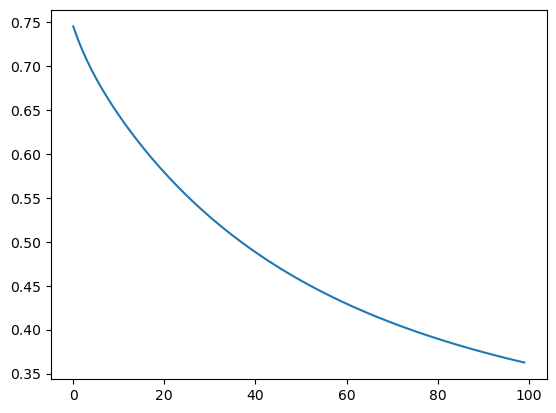

In [54]:
plt.plot(overall)

### Batch Gradient Descent

In [6]:
xi = np.array([4,6,7,8,1,9])
yi = np.array([17,23,26,29,8,32])

eta = 0.02
b0 = 0.4
w0 = -0.6
ycap = xi*w0 + b0

for i in range(1,11):

    db = -(1/len(xi))*np.sum((yi-ycap))     
    dw = -(1/len(xi))*np.sum((yi-ycap)*xi)  
        
    new_b = b0 - eta*db
    new_w = w0 - eta*dw
                    
    b0 = new_b
    w0 = new_w
    ycap = xi*w0 + b0
    
    print('L = ', (1/(2*len(xi))*np.sum((yi-ycap)**2)))
    print('w = ',w0,'; b =', b0)


L =  10.927738925925931
w =  2.9006666666666665 ; b = 0.912
L =  1.617766586924691
w =  3.4593844444444444 ; b = 1.0053488888888888
L =  1.3701526431780178
w =  3.5472005481481483 ; b = 1.0316470592592593
L =  1.354789329245048
w =  3.5596466065925925 ; b = 1.0471740541234567
L =  1.3454377889620857
w =  3.5600339275169546 ; b = 1.0609384689385184
L =  1.3363010834674922
w =  3.5584965058185016 ; b = 1.0743824080161033
L =  1.327230275172079
w =  3.556656435092723 ; b = 1.087736834176956
L =  1.3182211381659976
w =  3.5547733395457364 ; b = 1.101038846732599
L =  1.3092731570168057
w =  3.5528887578676103 ; b = 1.1142945135176112
L =  1.3003859141229077
w =  3.551009320646223 ; b = 1.127504934829371


### Mini Batch Gradient Descent

In [19]:
xi = np.array([4,5,7,8,1,9])
yi = np.array([17,23,26,29,8,32])
eta = 0.05
b0 = 0.5
w0 = -0.1
ycap = xi*w0 + b0

#np.random.seed(23)

#i_rand = np.random()

batch_X = []
batch_y = []

n= len(xi)
overall = []

for i in range(0,3):
    k = i + i
    batch_X.append(xi[k:k+2])
    batch_y.append(yi[k:k+2])


for epoch in range(1,1001):
    for j in range(0,len(batch_X)):
        ycap = xi[j]*w0 + b0
        l =  (1/(2*n))*((yi[j]-ycap)**2)

        db = -(1/n)*(yi[j]-ycap)
        dw = -(1/n)*(yi[j]-ycap)*xi[j]
            
        new_b = b0 - eta*db
        new_w = w0 - eta*dw
                        
        b0 = new_b
        w0 = new_w
        
        print('L = ',l)
        print('w = ',w0,'; b =', b0)

    ycap = xi*w0 + b0
    l = (1/(2*n))*np.sum((yi-ycap)**2)
    # l = log_loss(yi,ycap)
    overall.append(l)
    print('overall L = ', l)

L =  23.80083333333333
w =  0.4633333333333334 ; b = 0.6408333333333334
L =  33.47515052083333
w =  1.2984375000000001 ; b = 0.8078541666666668
L =  21.609107736689808
w =  2.237784027777778 ; b = 0.9420465277777779
overall L =  41.87102528415694
L =  4.208904417015857
w =  2.4746779398148147 ; b = 1.0012700057870372
L =  7.720597983102035
w =  2.8757337854456018 ; b = 1.0814811749131945
L =  1.9107171091012982
w =  3.155056087852045 ; b = 1.1213843609712577
overall L =  6.888380767155569
L =  0.8847594819367993
w =  3.26366913077273 ; b = 1.1485376217014291
L =  2.5512817238517838
w =  3.4942156609575186 ; b = 1.1946469277383869
L =  0.00996730740300915
w =  3.5143898619484593 ; b = 1.1975289564513785
overall L =  2.714662364358741
L =  0.25372637308329227
w =  3.572553581806952 ; b = 1.2120698864160018
L =  1.283908194335153
w =  3.7361020069965036 ; b = 1.244779571453912
L =  0.1627490349284145
w =  3.6545815458047866 ; b = 1.2331337912836668
overall L =  2.5459144932906304
L =  0.1

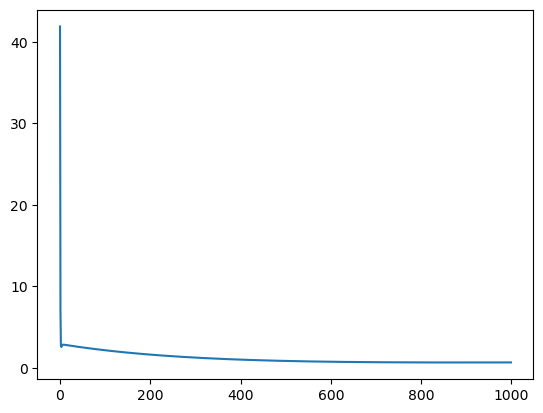

In [20]:
plt.plot(overall)